# Finance with python and stock market anaylsis using pandas

In [16]:
from bsedata.bse import BSE
import numpy as np
import pandas as pd 
import requests 
import xlsxwriter
import math
from scipy import stats
import matplotlib.pyplot as plt
from statistics import mean
from yahoofinancials import YahooFinancials
import pandas_datareader.data as reader
import datetime
from dateutil.relativedelta import relativedelta
import yfinance as yf
from bs4 import BeautifulSoup


In [4]:
from secrets import IEX_CLOUD_API_TOKEN

# Getting NIFTY 50 list of companies - YF

In [5]:
table = pd.read_html("https://finance.yahoo.com/quote/%5ENSEI/components?p=%5ENSEI")[0]
table

,Symbol,Company Name,Last Price,Change,% Change,Volume
0,NTPC.NS,NTPC Limited,99.05,0.00,0.00%,16524143.0
1,NESTLEIND.NS,Nestlé India Limited,17095.65,5.70,+0.03%,103578.0
2,COALINDIA.NS,Coal India Limited,124.50,-0.10,-0.08%,7731579.0
3,ICICIBANK.NS,ICICI Bank Limited,559.10,-0.65,-0.12%,24424809.0
4,MM.NS,MM.NS,NaN,NaN,NaN,NaN
5,RELIANCE.NS,Reliance Industries Limited,1901.15,-0.55,-0.03%,7937897.0
6,KOTAKBANK.NS,Kotak Mahindra Bank Limited,1697.70,-3.05,-0.18%,3316522.0
7,ONGC.NS,Oil and Natural Gas Corporation Limited,102.85,-0.20,-0.19%,23080359.0
8,TITAN.NS,Titan Company Limited,1522.90,4.20,+0.28%,1788869.0
9,CIPLA.NS,Cipla Limited,949.30,3.00,+0.32%,10203889.0


# Getting SENSEX 30 - BSE API & YF API

In [34]:
b  = BSE()

In [35]:
codes = ['500209' , '532540' , '500325' , '532174' , '500180','532281','532454' , '532187' ,'500112' , '500510' , '532755' , '532215' , '500875' , '532977' , '500312' , '500470' , '532555' , '500520', '500820' , '532898' , '532978' , '500114' ,'500790','532538','524715' , '500034' , '532500' , '500010' , '500696' , '500247']


In [36]:
companies = []
for i in codes:
    companies.append(b.getQuote(i)['securityID'])

companies

['INFY',
 'TCS',
 'RELIANCE',
 'ICICIBANK',
 'HDFCBANK',
 'HCLTECH',
 'BHARTIARTL',
 'INDUSINDBK',
 'SBIN',
 'LT',
 'TECHM',
 'AXISBANK',
 'ITC',
 'BAJAJ-AUTO',
 'ONGC',
 'TATASTEEL',
 'NTPC',
 'M&M',
 'ASIANPAINT',
 'POWERGRID',
 'BAJAJFINSV',
 'TITAN',
 'NESTLEIND',
 'ULTRACEMCO',
 'SUNPHARMA',
 'BAJFINANCE',
 'MARUTI',
 'HDFC',
 'HINDUNILVR',
 'KOTAKBANK']

In [25]:
data  = [i + '.NS' for i in companies]

In [26]:
frame  = yf.download(data)

[*********************100%***********************]  30 of 30 completed


In [27]:
returns  = frame['Adj Close'].pct_change()
returns = returns.dropna()
returns

,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,HCLTECH.NS,HDFC.NS,HDFCBANK.NS,HINDUNILVR.NS,...,ONGC.NS,POWERGRID.NS,RELIANCE.NS,SBIN.NS,SUNPHARMA.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2007-10-08,-0.001427,-0.031466,-0.007342,-0.021834,0.019980,-0.008799,0.007842,0.007692,0.002993,-0.005182,...,-0.027126,-0.051193,-0.028606,-0.039951,-0.012387,-0.053296,0.005174,-0.003603,-0.010530,-0.044716
2007-10-09,0.026037,0.019423,0.018702,0.024845,0.010142,0.053924,0.038418,0.016178,0.009806,0.016082,...,0.048529,0.068098,0.073848,0.060638,-0.020957,0.058330,0.015394,0.015734,0.049304,0.024055
2007-10-10,-0.020941,0.044754,-0.008603,-0.015152,-0.009765,0.030901,0.028255,-0.000199,-0.002955,-0.001115,...,0.025121,0.009318,0.007077,0.017752,-0.004486,0.148207,0.027901,0.092562,-0.010734,0.023302
2007-10-11,0.035402,-0.003215,-0.000591,0.007308,-0.004861,0.023672,-0.050858,0.006238,0.030876,0.008034,...,0.055149,0.111759,0.004640,0.011177,0.054678,-0.113442,-0.047535,0.053383,0.010385,0.008097
2007-10-12,-0.017554,-0.020665,-0.030360,-0.030164,-0.014794,-0.025222,-0.002239,-0.018558,-0.019169,-0.020368,...,0.026368,-0.006556,-0.024633,-0.042288,0.000000,-0.000293,-0.007929,-0.062163,-0.026453,0.021174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-13,-0.012105,0.039962,0.017354,0.070232,0.048271,0.026223,-0.025758,0.038473,0.024359,-0.003087,...,0.040796,0.037783,0.010805,0.036947,0.012917,0.032235,-0.043893,-0.036544,0.013340,0.014602
2021-04-15,0.006613,0.011876,-0.001374,-0.006832,-0.014475,0.005968,0.008643,0.013609,0.021245,0.002546,...,0.029887,-0.004551,0.006471,0.004985,0.009405,0.021843,0.037016,-0.008684,0.005194,-0.009865
2021-04-16,0.029370,0.000523,0.010327,0.008732,-0.009377,0.002596,0.021020,0.010561,-0.001014,-0.000711,...,0.020932,0.009865,-0.006275,-0.008170,0.020213,-0.008851,-0.007394,0.017268,0.006825,0.026899


<AxesSubplot:xlabel='Date'>

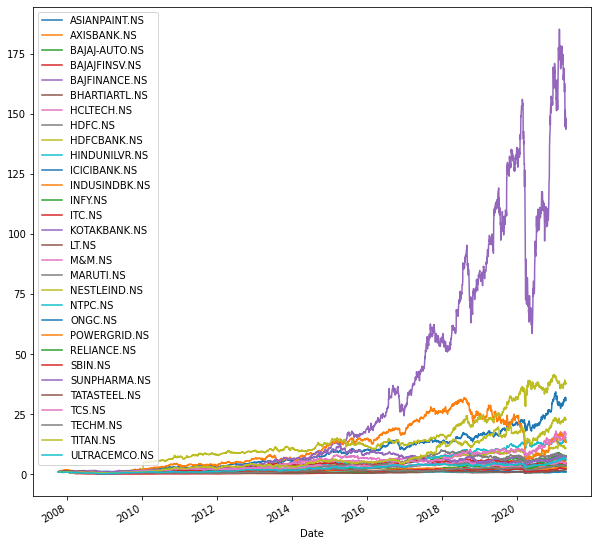

In [28]:
(1+returns).cumprod().plot(figsize=(10,10))

# Getting the S&P 500 index - list of companies -IEX

In [6]:
stocks_list = pd.read_csv('sp_500_stocks.csv')
stocks_list
print("The list of S&P 500 companies: ")
for i in stocks_list['Ticker']:
    print(i)

The list of S&P 500 companies: 
A
AAL
AAP
AAPL
ABBV
ABC
ABMD
ABT
ACN
ADBE
ADI
ADM
ADP
ADSK
AEE
AEP
AES
AFL
AIG
AIV
AIZ
AJG
AKAM
ALB
ALGN
ALK
ALL
ALLE
ALXN
AMAT
AMCR
AMD
AME
AMGN
AMP
AMT
AMZN
ANET
ANSS
ANTM
AON
AOS
APA
APD
APH
APTV
ARE
ATO
ATVI
AVB
AVGO
AVY
AWK
AXP
AZO
BA
BAC
BAX
BBY
BDX
BEN
BF.B
BIIB
BIO
BK
BKNG
BKR
BLK
BLL
BMY
BR
BRK.B
BSX
BWA
BXP
C
CAG
CAH
CARR
CAT
CB
CBOE
CBRE
CCI
CCL
CDNS
CDW
CE
CERN
CF
CFG
CHD
CHRW
CHTR
CI
CINF
CL
CLX
CMA
CMCSA
CME
CMG
CMI
CMS
CNC
CNP
COF
COG
COO
COP
COST
COTY
CPB
CPRT
CRM
CSCO
CSX
CTAS
CTL
CTSH
CTVA
CTXS
CVS
CVX
CXO
D
DAL
DD
DE
DFS
DG
DGX
DHI
DHR
DIS
DISCA
DISCK
DISH
DLR
DLTR
DOV
DOW
DPZ
DRE
DRI
DTE
DUK
DVA
DVN
DXC
DXCM
EA
EBAY
ECL
ED
EFX
EIX
EL
EMN
EMR
EOG
EQIX
EQR
ES
ESS
ETFC
ETN
ETR
EVRG
EW
EXC
EXPD
EXPE
EXR
F
FANG
FAST
FB
FBHS
FCX
FDX
FE
FFIV
FIS
FISV
FITB
FLIR
FLS
FLT
FMC
FOX
FOXA
FRC
FRT
FTI
FTNT
FTV
GD
GE
GILD
GIS
GL
GLW
GM
GOOG
GOOGL
GPC
GPN
GPS
GRMN
GS
GWW
HAL
HAS
HBAN
HBI
HCA
HD
HES
HFC
HIG
HII
HLT
HOLX
HON
HPE
HPQ
HRB
HRL
HSIC
HST
HSY


In [7]:
topics = ['Ticker', 'Price','Market Capitalization', 'Number Of Shares to Buy']

In [8]:
def split_list(lst, n):
    """Yield successive n-sized split_list from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

In [9]:
split_groups = list(split_list(stocks_list['Ticker'], 100))
stock_string = []
for i in range(0, len(split_groups)):
    stock_string.append(','.join(split_groups[i]))

In [10]:
index_list = pd.DataFrame(columns = topics)

In [11]:
for stocks in stock_string:
    batch_api_call_url = f'https://sandbox.iexapis.com/stable/stock/market/batch/?types=quote&symbols={stocks}&token={IEX_CLOUD_API_TOKEN}'
    data = requests.get(batch_api_call_url).json()
    for symbol in stocks.split(','):
        index_list = index_list.append(
                                        pd.Series([symbol, 
                                                   data[symbol]['quote']['latestPrice'], 
                                                   data[symbol]['quote']['marketCap'], 
                                                   'N/A'], 
                                                  index = topics), 
                                        ignore_index = True)
        
index_list

,Ticker,Price,Market Capitalization,Number Of Shares to Buy
0,A,138.55,41547720188,N/A
1,AAL,21.23,13644923643,N/A
2,AAP,201.50,13311389851,N/A
3,AAPL,137.25,2324630100668,N/A
4,ABBV,112.01,194066214670,N/A
...,...,...,...,...
500,YUM,120.27,36727595351,N/A
501,ZBH,175.54,36814255185,N/A
502,ZBRA,521.78,26837257143,N/A
503,ZION,54.15,8859360446,N/A


In [12]:
portfolio = input("Enter the value of your portfolio:")

Enter the value of your portfolio:1000000


In [13]:
try:
    val = float(portfolio)
except ValueError:
    print("That's not a number! \n Try again:")
    portfolio = input("Enter the value of your portfolio:")

In [14]:
position = float(portfolio) / len(index_list.index)

In [15]:
for i in range(0, len(index_list['Ticker'])-1):
    index_list.loc[i, 'Number Of Shares to Buy'] = math.floor(position / index_list['Price'][i])
print(index_list['Ticker'] , index_list['Market Capitalization'])

0         A
1       AAL
2       AAP
3      AAPL
4      ABBV
       ... 
500     YUM
501     ZBH
502    ZBRA
503    ZION
504     ZTS
Name: Ticker, Length: 505, dtype: object 0        41547720188
1        13644923643
2        13311389851
3      2324630100668
4       194066214670
           ...      
500      36727595351
501      36814255185
502      26837257143
503       8859360446
504      81045697009
Name: Market Capitalization, Length: 505, dtype: object


# First idea - sorting based on market cap to invest accordingly

In [16]:
print(index_list.sort_values('Market Capitalization' , ascending = False))

    Ticker    Price Market Capitalization Number Of Shares to Buy
3     AAPL   137.25         2324630100668                      14
320   MSFT   268.56         2020232660681                       7
36    AMZN  3359.01         1688489409967                       0
204   GOOG  2377.14         1586982267333                       0
205  GOOGL  2294.46         1563277318889                       0
..     ...      ...                   ...                     ...
498    XRX    24.49            4631793955                      80
327    NBL     8.70            4254060450                     227
227    HRB    22.50            4132784344                      88
194    FTI     7.15            3192148704                     276
19     AIV     6.50             995257587                     304

[505 rows x 4 columns]


In [17]:
index_list

,Ticker,Price,Market Capitalization,Number Of Shares to Buy
0,A,138.55,41547720188,14
1,AAL,21.23,13644923643,93
2,AAP,201.50,13311389851,9
3,AAPL,137.25,2324630100668,14
4,ABBV,112.01,194066214670,17
...,...,...,...,...
500,YUM,120.27,36727595351,16
501,ZBH,175.54,36814255185,11
502,ZBRA,521.78,26837257143,3
503,ZION,54.15,8859360446,36


# Getting individual data

In [18]:
name = 'AMZN'
api_url = f'https://sandbox.iexapis.com/stable/stock/{name}/quote/?token={IEX_CLOUD_API_TOKEN}'
data = requests.get(api_url).json()
print("market cap : " , data['marketCap'])
print("PE ratio : " , data['peRatio'])
print("Latest price : " , data['latestPrice'])

market cap :  1753239434213
PE ratio :  81.38
Latest price :  3461.66


# Saving the pandas dataframe in xlsx format

In [15]:
writer = pd.ExcelWriter('trades.xlsx', engine='xlsxwriter')
index_list.to_excel(writer, sheet_name='Trades List', index = False)

In [16]:
writer.save


# Getting historical data - YF

In [42]:
low_high = {}
name = 'CSCO'
test = YahooFinancials(name)
data = test.get_historical_price_data("2020-04-01","2021-04-01","daily")

In [43]:
print(data)
#it returns an dict containing all the required historical information

{'CSCO': {'eventsData': {'dividends': {'2021-01-04': {'amount': 0.36, 'date': 1609770600, 'formatted_date': '2021-01-04'}, '2020-04-02': {'amount': 0.36, 'date': 1585834200, 'formatted_date': '2020-04-02'}, '2020-07-02': {'amount': 0.36, 'date': 1593696600, 'formatted_date': '2020-07-02'}, '2020-10-01': {'amount': 0.36, 'date': 1601559000, 'formatted_date': '2020-10-01'}}}, 'firstTradeDate': {'formatted_date': '1990-02-16', 'date': 635178600}, 'currency': 'USD', 'instrumentType': 'EQUITY', 'timeZone': {'gmtOffset': -14400}, 'prices': [{'date': 1585747800, 'high': 38.86000061035156, 'low': 37.869998931884766, 'open': 38.16999816894531, 'close': 38.33000183105469, 'volume': 26790700, 'adjclose': 36.76504898071289, 'formatted_date': '2020-04-01'}, {'date': 1585834200, 'high': 39.95000076293945, 'low': 37.470001220703125, 'open': 37.84000015258789, 'close': 39.79999923706055, 'volume': 28180500, 'adjclose': 38.53696823120117, 'formatted_date': '2020-04-02'}, {'date': 1585920600, 'high': 40

In [44]:
#getting historical data for my favourite tech companies

In [45]:
historical_prices = pd.DataFrame()
start = (datetime.date.today()-datetime.timedelta(365)).strftime('%Y-%m-%d')
end = (datetime.date.today()).strftime('%Y-%m-%d')

fav_tech_companies = ["AAPL", "MSFT", "CSCO",
                      "AMZN", "GOOGL", "IBM", "TWTR", "INTC", "TSLA"]


for company in fav_tech_companies:
    comp_data = YahooFinancials(company)
    data = comp_data.get_historical_price_data(start, end, "daily")
    price = data[company]['prices']
    temp = pd.DataFrame(price)[["formatted_date", "adjclose"]]
    temp.set_index("formatted_date", inplace=True)
    temp.dropna(inplace=True)
    historical_prices[company] = temp["adjclose"]

In [46]:
historical_prices

,AAPL,MSFT,CSCO,AMZN,GOOGL,IBM,TWTR,INTC,TSLA
formatted_date,,,,,,,,,
2020-04-21,66.576424,166.131760,39.263165,2328.120117,1212.160034,110.622040,25.750000,54.929993,137.343994
2020-04-22,68.494064,171.774429,40.434772,2363.489990,1258.410034,113.037979,28.440001,58.575100,146.421997
2020-04-23,68.228622,169.695557,40.299217,2399.449951,1271.170044,114.970741,27.860001,57.541996,141.126007
2020-04-24,70.198349,172.794067,41.170658,2410.219971,1276.599976,118.163582,28.740000,57.756413,145.029999
2020-04-27,70.247971,172.299103,41.693520,2376.000000,1270.859985,119.300507,30.000000,57.961086,159.750000
...,...,...,...,...,...,...,...,...,...
2021-04-14,132.029999,255.589996,51.369999,3333.000000,2241.909912,132.630005,69.739998,64.190002,732.229980
2021-04-15,134.500000,259.500000,51.639999,3379.090088,2285.250000,132.580002,71.709999,65.019997,738.849976
2021-04-16,134.160004,260.739990,52.799999,3399.439941,2282.750000,133.589996,70.120003,64.750000,739.780029


# Plotting historical data

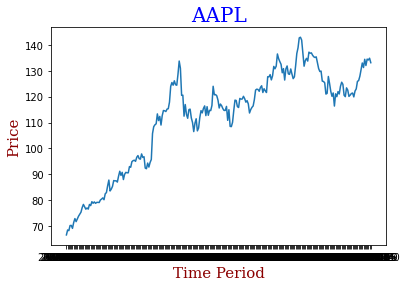

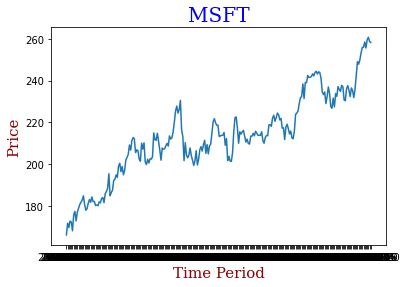

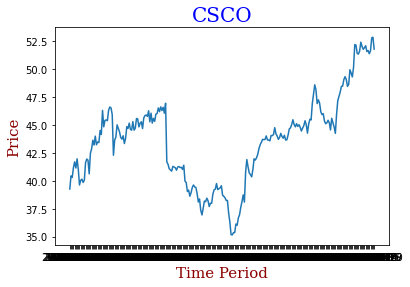

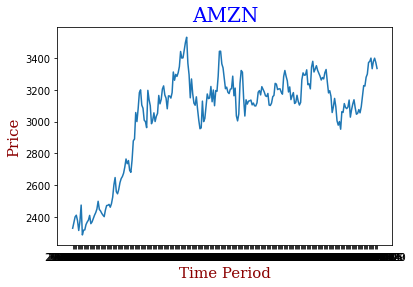

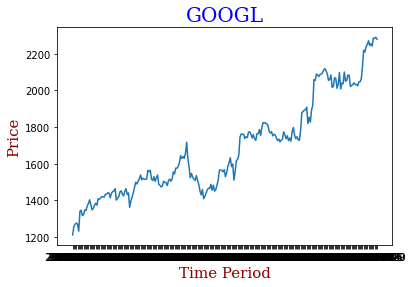

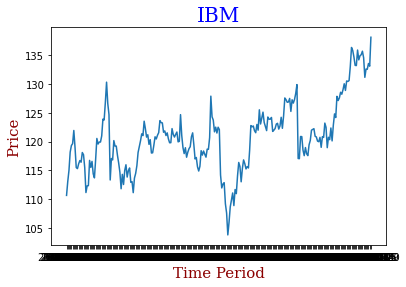

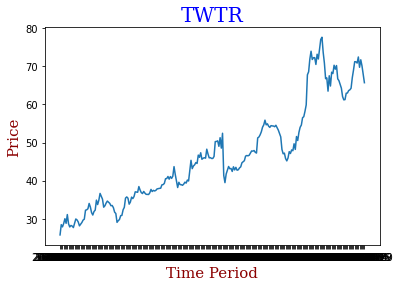

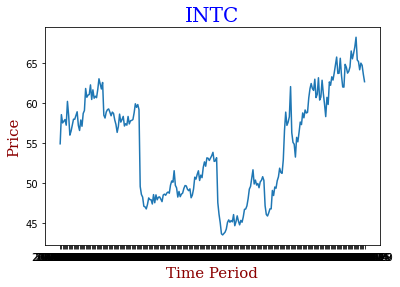

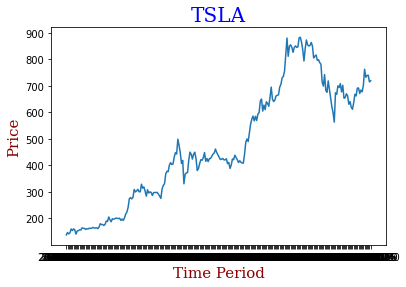

In [54]:
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
def plot_history(symbol):
    plt.plot(historical_prices[symbol])
    plt.title(symbol , fontdict = font1)
    plt.xlabel('Time Period' , fontdict = font2)
    plt.ylabel('Price' , fontdict = font2)
    plt.figure(figsize=(8, 3))
    plt.show()

for name in fav_tech_companies:
    plot_history(name)

# Getting low and high prices over a particular time period - for analysing trend

In [47]:

for company in fav_tech_companies:
    comp_data = YahooFinancials(company)
    data = comp_data.get_historical_price_data(start, end, "daily")
    price = data[company]['prices']
    temp = pd.DataFrame(price)[["formatted_date", "adjclose" , "low","high" , "volume"]]
    temp.set_index("formatted_date", inplace=True)
    temp.dropna(inplace=True)
    historical_prices[company] = temp["adjclose"]
    low_high[company] = temp

In [48]:
low_high["TSLA"]

,adjclose,low,high,volume
formatted_date,,,,
2020-04-21,137.343994,134.757996,150.666000,101045500
2020-04-22,146.421997,137.742004,146.800003,70827500
2020-04-23,141.126007,140.626007,146.800003,66183500
2020-04-24,145.029999,139.636002,146.145996,66060000
2020-04-27,159.750000,147.000000,159.897995,103407000
...,...,...,...,...
2021-04-14,732.229980,728.030029,780.789978,49017400
2021-04-15,738.849976,721.309998,743.690002,27848900
2021-04-16,739.780029,724.599976,749.409973,27924000


#  Strategy based on returns - 12 month return - NIFTY 

In [30]:
import datetime as dt

In [29]:
nifty = pd.read_html("https://in.finance.yahoo.com/quote/%5ENSEI/components?p=%5ENSEI")[0]
symbols = nifty.Symbol.tolist()
symbols

['NTPC.NS',
 'NESTLEIND.NS',
 'COALINDIA.NS',
 'ICICIBANK.NS',
 'MM.NS',
 'RELIANCE.NS',
 'KOTAKBANK.NS',
 'ONGC.NS',
 'TITAN.NS',
 'CIPLA.NS',
 'BRITANNIA.NS',
 'TCS.NS',
 'WIPRO.NS',
 'HINDALCO.NS',
 'TATASTEEL.NS',
 'BHARTIARTL.NS',
 'ITC.NS',
 'HEROMOTOCO.NS',
 'INDUSINDBK.NS',
 'LT.NS',
 'TECHM.NS',
 'MARUTI.NS',
 'TATACONSUM.NS',
 'BAJAJ-AUTO.NS',
 'SHREECEM.NS',
 'GRASIM.NS',
 'HDFCLIFE.NS',
 'BAJFINANCE.NS',
 'BAJAJFINSV.NS',
 'ULTRACEMCO.NS']

In [31]:
start_time = dt.datetime(2018,1,31)
end_time = dt.datetime(2020,1,31)

In [32]:
data_frame = reader.get_data_yahoo(symbols,start_time,end_time)['Adj Close']

data_frame

c:\users\91805\appdata\local\programs\python\python37-32\lib\site-packages\pandas_datareader\base.py:272: SymbolWarning: Failed to read symbol: 'MM.NS', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


Symbols,NTPC.NS,NESTLEIND.NS,COALINDIA.NS,ICICIBANK.NS,RELIANCE.NS,KOTAKBANK.NS,ONGC.NS,TITAN.NS,CIPLA.NS,BRITANNIA.NS,...,MARUTI.NS,TATACONSUM.NS,BAJAJ-AUTO.NS,SHREECEM.NS,GRASIM.NS,HDFCLIFE.NS,BAJFINANCE.NS,BAJAJFINSV.NS,ULTRACEMCO.NS,MM.NS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-31,119.181892,7044.811523,223.637451,345.805695,937.703613,1107.786987,173.823639,851.391479,584.372009,2191.435059,...,9132.671875,282.722900,3060.888672,17009.052734,1135.630371,425.099091,1668.206299,4806.686035,4345.329102,NaN
2018-02-01,118.341881,6895.505859,220.688477,339.192291,920.682007,1119.774414,166.518707,813.646545,579.338989,2217.797852,...,9029.097656,280.485687,3130.413818,17252.974609,1163.873169,446.254517,1719.509521,5032.469727,4354.700195,NaN
2018-02-02,115.646721,6730.070312,216.768951,328.316956,882.151550,1084.811279,164.639084,805.030334,573.516541,2211.224609,...,8634.151367,267.353851,2972.973633,16843.076172,1105.087158,440.430542,1619.537720,4929.940918,4144.474121,NaN
2018-02-05,116.381752,6729.362305,220.091217,323.026276,880.005615,1061.136108,161.264267,785.545898,572.480225,2159.879395,...,8720.583984,265.651581,2921.838867,16444.941406,1074.935669,439.733673,1595.725220,4912.211426,4111.700195,NaN
2018-02-06,115.716705,6617.688965,216.768951,324.006012,870.202271,1032.716064,158.444809,766.306213,556.838440,2119.527588,...,8628.388672,259.426147,2875.565186,16328.443359,1043.021729,436.846558,1652.596436,4898.827637,4058.400146,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-27,102.725838,15370.023438,161.434952,537.250000,1486.820801,1618.349976,107.306000,1204.656738,463.246796,3022.530762,...,7085.068848,379.606476,2950.119629,23492.095703,808.272644,599.700012,4154.800293,9552.239258,4662.250977,NaN
2020-01-28,101.727173,15125.336914,157.928207,528.200012,1452.476440,1626.050049,106.711121,1185.998291,463.496124,3029.243896,...,6934.671875,377.918915,2929.352051,23336.351562,804.097656,603.750000,4203.338867,9625.897461,4594.563965,NaN
2020-01-29,102.771225,15566.931641,159.514587,526.599976,1460.470459,1640.449951,107.672073,1177.264526,460.354279,3060.619385,...,6947.803711,380.648834,2958.972168,23400.261719,797.536804,605.049988,4408.866699,9888.700195,4553.842773,NaN


In [33]:
monthly_returns = data_frame.pct_change().resample('M').agg(lambda x:(x+1).prod() - 1)

monthly_returns

Symbols,NTPC.NS,NESTLEIND.NS,COALINDIA.NS,ICICIBANK.NS,RELIANCE.NS,KOTAKBANK.NS,ONGC.NS,TITAN.NS,CIPLA.NS,BRITANNIA.NS,...,MARUTI.NS,TATACONSUM.NS,BAJAJ-AUTO.NS,SHREECEM.NS,GRASIM.NS,HDFCLIFE.NS,BAJFINANCE.NS,BAJAJFINSV.NS,ULTRACEMCO.NS,MM.NS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2018-02-28,-0.025013,0.039161,0.032048,-0.112481,-0.007022,-0.016592,-0.074465,-0.061411,-0.004222,0.066202,...,-0.069271,-0.052124,-0.094856,-0.033874,-0.006336,0.080094,-0.022410,0.049737,-0.051666,0.0
2018-03-31,0.039510,0.056934,-0.029422,-0.111413,-0.075271,-0.039200,-0.044063,0.154567,-0.074960,-0.004735,...,0.001147,-0.060799,-0.091339,-0.025687,-0.088314,-0.014636,0.077610,0.023725,-0.049475,0.0
2018-04-30,0.014437,0.145425,0.006001,0.021017,0.091311,0.155850,0.015467,0.041919,0.113576,0.109162,...,-0.005208,0.149952,0.075746,0.046143,0.040727,0.139949,0.079291,0.060147,0.040215,0.0
2018-05-31,-0.026721,0.034509,0.039474,0.005630,-0.043548,0.101973,-0.014677,-0.083215,-0.135990,0.074503,...,-0.031509,-0.095278,-0.068516,-0.003730,-0.049282,-0.051926,0.105991,0.102077,-0.088577,0.0
2018-06-30,-0.047150,0.016169,-0.107679,-0.036389,0.061971,0.006257,-0.109612,-0.023997,0.175019,0.048920,...,0.033782,0.010013,0.021816,-0.078575,-0.031689,-0.071261,0.088369,-0.036601,0.019680,0.0
2018-07-31,-0.030066,0.073424,-0.012294,0.117108,0.219600,-0.026384,0.046086,0.043078,0.040055,0.065297,...,0.078743,-0.083349,-0.019482,0.098132,0.018225,0.102050,0.176884,0.198970,0.101221,0.0
2018-08-31,0.107523,0.101912,0.095174,0.131079,0.046922,-0.014998,0.086602,-0.022415,0.037443,0.029738,...,-0.027540,-0.051033,0.016592,0.112098,0.047306,-0.081460,0.058824,-0.032892,0.067171,0.0
2018-09-30,-0.013069,-0.162542,-0.068893,-0.108144,0.013128,-0.113148,-0.008129,-0.096760,-0.012233,-0.135562,...,-0.192213,-0.002347,-0.020912,-0.107449,-0.043091,-0.151922,-0.241056,-0.109902,-0.092850,0.0


In [34]:
past_11_return = (monthly_returns+1).rolling(11).apply(np.prod) - 1
past_11_return

Symbols,NTPC.NS,NESTLEIND.NS,COALINDIA.NS,ICICIBANK.NS,RELIANCE.NS,KOTAKBANK.NS,ONGC.NS,TITAN.NS,CIPLA.NS,BRITANNIA.NS,...,MARUTI.NS,TATACONSUM.NS,BAJAJ-AUTO.NS,SHREECEM.NS,GRASIM.NS,HDFCLIFE.NS,BAJFINANCE.NS,BAJAJFINSV.NS,ULTRACEMCO.NS,MM.NS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
formation = dt.datetime(2019,12,31)
end_measurement  = formation - relativedelta(months=1)

returns_12_month = past_11_return.loc[end_measurement]
returns_12_month = returns_12_month.reset_index()

returns_12_month['quintile'] = pd.qcut(returns_12_month.iloc[:,1] , 5 , labels=False)
returns_12_month

topFive = returns_12_month[returns_12_month.quintile == 4]
lastFive =  returns_12_month[returns_12_month.quintile == 0]

In [38]:
top_returns = monthly_returns.loc[formation + relativedelta(months=1) , data_frame.columns.isin(topFive.Symbols)]
short_returns = monthly_returns.loc[formation + relativedelta(months=1) , data_frame.columns.isin(lastFive.Symbols)]

Symbols
COALINDIA.NS    -0.140289
CIPLA.NS        -0.065454
HINDALCO.NS     -0.123988
TATASTEEL.NS    -0.070649
ITC.NS          -0.010728
HEROMOTOCO.NS    0.024068
Name: 2020-01-31 00:00:00, dtype: float64

# HQM Score strategy - IEX

In [42]:
name = 'AAPL'
api_url = f'https://sandbox.iexapis.com/stable/stock/{name}/stats?token={IEX_CLOUD_API_TOKEN}'
data = requests.get(api_url).json()
print(data['companyName'])
print(data['dividendYield'])
print(data['year1ChangePercent'])
print(data['year5ChangePercent'])

Apple Inc
0.006212538376054744
0.9221578037597757
4.364068810038814


In [ ]:
topics = ['Ticker', 'Price', 'One-Year Price Return', 'Number of Shares to Buy']

In [19]:
hqmNames = [
    'Ticker',
    'Price',
    'Number of shares to buy',
    'One-Year Price Return',
    'One-Year Return Percentile',
    'Six-Month Price Return',
    'Six-Month Return Percentile',
    'Three-Month Price Return',
    'Three-Month Return Percentile',
    'One-Month Price Return',
    'One-Month Return Percentile',
    'HQM Score'
]

hqmDf = pd.DataFrame (columns = hqmNames)

for stocks in stock_string:
    batch_api_call_url = f'https://sandbox.iexapis.com/stable/stock/market/batch?symbols={stocks}&types=price,stats&token={IEX_CLOUD_API_TOKEN}'
    data = requests.get(batch_api_call_url).json()
    for symbol in stocks.split(','):
        hqmDf = hqmDf.append(
            pd.Series(
            [
                
                 symbol,
                 data[symbol]['price'],
                'N/A',
                 data[symbol]['stats'] ['year1ChangePercent'],
                'N/A',
                 data[symbol]['stats'] ['month6ChangePercent'],
                'N/A',
                 data[symbol]['stats'] ['month3ChangePercent'],
                'N/A',
                 data[symbol]['stats'] ['month1ChangePercent'],
                'N/A',
                'N/A'
                
                
            ],
            index = hqmNames
            ),
            ignore_index = True
        )
        
hqmDf

,Ticker,Price,Number of shares to buy,One-Year Price Return,One-Year Return Percentile,Six-Month Price Return,Six-Month Return Percentile,Three-Month Price Return,Three-Month Return Percentile,One-Month Price Return,One-Month Return Percentile,HQM Score
0,A,135.06,N/A,0.742042,N/A,0.275615,N/A,0.068541,N/A,0.096635,N/A,N/A
1,AAL,20.48,N/A,1.007527,N/A,0.768274,N/A,0.410496,N/A,-0.103547,N/A,N/A
2,AAP,199.98,N/A,0.665175,N/A,0.254941,N/A,0.174636,N/A,0.079823,N/A,N/A
3,AAPL,135.48,N/A,0.910597,N/A,0.133354,N/A,0.05918,N/A,0.070433,N/A,N/A
4,ABBV,113.37,N/A,0.385403,N/A,0.291751,N/A,-0.011881,N/A,-0.015166,N/A,N/A
...,...,...,...,...,...,...,...,...,...,...,...,...
500,YUM,119.15,N/A,0.527207,N/A,0.212502,N/A,0.115476,N/A,0.088985,N/A,N/A
501,ZBH,174.33,N/A,0.603071,N/A,0.182097,N/A,0.078622,N/A,0.075888,N/A,N/A
502,ZBRA,500.35,N/A,1.596231,N/A,0.769475,N/A,0.256861,N/A,0.085625,N/A,N/A
503,ZION,53.17,N/A,1.160331,N/A,0.831763,N/A,0.156023,N/A,-0.005183,N/A,N/A


In [20]:
tp = [
                'One-Year',
                'Six-Month',
                'Three-Month',
                'One-Month'
                ]
for row in hqmDf.index:
    for time_period in tp:
        change_col = f'{time_period} Price Return'
        percentile_col = f'{time_period} Return Percentile'
        if hqmDf.loc[row, change_col] == None:
            hqmDf.loc[row, change_col] = 0.0
            
for row in hqmDf.index:
    for time_period in tp:
        hqmDf.loc[row, f'{time_period} Return Percentile'] = stats.percentileofscore(hqmDf[f'{time_period} Price Return'], hqmDf.loc[row, f'{time_period} Price Return'])/100

for time_period in tp:
    print(hqmDf[f'{time_period} Return Percentile'])
  
hqmDf

0       0.59604
1      0.760396
2      0.536634
3      0.710891
4       0.30099
         ...   
500    0.439604
501     0.50297
502    0.924752
503    0.821782
504    0.263366
Name: One-Year Return Percentile, Length: 505, dtype: object
0      0.526733
1      0.916832
2      0.491089
3      0.293069
4      0.556436
         ...   
500    0.425743
501    0.384158
502    0.918812
503    0.944554
504    0.122772
Name: Six-Month Return Percentile, Length: 505, dtype: object
0      0.283168
1      0.988119
2      0.706931
3      0.257426
4      0.073267
         ...   
500    0.449505
501    0.326733
502    0.881188
503    0.649505
504    0.194059
Name: Three-Month Return Percentile, Length: 505, dtype: object
0      0.815842
1      0.025743
2      0.716832
3      0.667327
4      0.116832
         ...   
500    0.782178
501     0.69901
502    0.756436
503    0.154455
504    0.750495
Name: One-Month Return Percentile, Length: 505, dtype: object


,Ticker,Price,Number of shares to buy,One-Year Price Return,One-Year Return Percentile,Six-Month Price Return,Six-Month Return Percentile,Three-Month Price Return,Three-Month Return Percentile,One-Month Price Return,One-Month Return Percentile,HQM Score
0,A,135.06,N/A,0.742042,0.59604,0.275615,0.526733,0.068541,0.283168,0.096635,0.815842,N/A
1,AAL,20.48,N/A,1.007527,0.760396,0.768274,0.916832,0.410496,0.988119,-0.103547,0.025743,N/A
2,AAP,199.98,N/A,0.665175,0.536634,0.254941,0.491089,0.174636,0.706931,0.079823,0.716832,N/A
3,AAPL,135.48,N/A,0.910597,0.710891,0.133354,0.293069,0.05918,0.257426,0.070433,0.667327,N/A
4,ABBV,113.37,N/A,0.385403,0.30099,0.291751,0.556436,-0.011881,0.073267,-0.015166,0.116832,N/A
...,...,...,...,...,...,...,...,...,...,...,...,...
500,YUM,119.15,N/A,0.527207,0.439604,0.212502,0.425743,0.115476,0.449505,0.088985,0.782178,N/A
501,ZBH,174.33,N/A,0.603071,0.50297,0.182097,0.384158,0.078622,0.326733,0.075888,0.69901,N/A
502,ZBRA,500.35,N/A,1.596231,0.924752,0.769475,0.918812,0.256861,0.881188,0.085625,0.756436,N/A
503,ZION,53.17,N/A,1.160331,0.821782,0.831763,0.944554,0.156023,0.649505,-0.005183,0.154455,N/A


In [24]:
for row in hqmDf.index:
    momentum_percentiles = []
    for time_period in tp:
        momentum_percentiles.append(hqmDf.loc[row, f'{time_period} Return Percentile'])
    hqmDf.loc[row, 'HQM Score'] = mean(momentum_percentiles)
hqmDf = hqmDf.sort_values(by = 'HQM Score', ascending = False)
hqmDf = hqmDf[:15]
hqmDf.reset_index(inplace = True , drop= True)
hqmDf 

,Ticker,Price,Number of shares to buy,One-Year Price Return,One-Year Return Percentile,Six-Month Price Return,Six-Month Return Percentile,Three-Month Price Return,Three-Month Return Percentile,One-Month Price Return,One-Month Return Percentile,HQM Score
0,LB,66.32,295,4.570839,1.0,1.018172,0.982178,0.493695,0.99604,0.110867,0.889109,0.966832
1,MHK,199.32,98,1.789832,0.946535,0.982782,0.980198,0.389693,0.978218,0.124753,0.924752,0.957426
2,AMAT,131.95,148,1.620225,0.926733,1.150797,0.984158,0.302322,0.928713,0.129724,0.934653,0.943564
3,NUE,78.75,248,1.327642,0.871287,0.658382,0.857426,0.459858,0.994059,0.163947,0.980198,0.925743
4,FCX,36.80,532,4.239215,0.99802,1.274894,0.986139,0.261204,0.883168,0.094012,0.80198,0.917327
5,HPQ,33.83,579,1.347972,0.873267,0.761896,0.912871,0.372779,0.968317,0.120451,0.912871,0.916832
6,LRCX,631.15,31,1.428598,0.893069,0.804165,0.930693,0.184623,0.732673,0.178478,0.990099,0.886634
7,HIG,66.96,292,0.865267,0.673267,0.812209,0.938614,0.298028,0.926733,0.169032,0.984158,0.880693
8,PWR,97.58,200,2.024731,0.964356,0.568765,0.807921,0.264818,0.891089,0.099872,0.833663,0.874257
9,ZBRA,500.35,39,1.596231,0.924752,0.769475,0.918812,0.256861,0.881188,0.085625,0.756436,0.870297


In [25]:
portfolio = input("Enter the value of your portfolio:")
position = float(portfolio) / len(hqmDf.index)
for i in range(0, len(hqmDf['Ticker'])-1):
    hqmDf.loc[i, 'Number of shares to buy'] = math.floor(position / hqmDf['Price'][i])
hqmDf

Enter the value of your portfolio:1000000


,Ticker,Price,Number of shares to buy,One-Year Price Return,One-Year Return Percentile,Six-Month Price Return,Six-Month Return Percentile,Three-Month Price Return,Three-Month Return Percentile,One-Month Price Return,One-Month Return Percentile,HQM Score
0,LB,66.32,1005,4.570839,1.0,1.018172,0.982178,0.493695,0.99604,0.110867,0.889109,0.966832
1,MHK,199.32,334,1.789832,0.946535,0.982782,0.980198,0.389693,0.978218,0.124753,0.924752,0.957426
2,AMAT,131.95,505,1.620225,0.926733,1.150797,0.984158,0.302322,0.928713,0.129724,0.934653,0.943564
3,NUE,78.75,846,1.327642,0.871287,0.658382,0.857426,0.459858,0.994059,0.163947,0.980198,0.925743
4,FCX,36.80,1811,4.239215,0.99802,1.274894,0.986139,0.261204,0.883168,0.094012,0.80198,0.917327
5,HPQ,33.83,1970,1.347972,0.873267,0.761896,0.912871,0.372779,0.968317,0.120451,0.912871,0.916832
6,LRCX,631.15,105,1.428598,0.893069,0.804165,0.930693,0.184623,0.732673,0.178478,0.990099,0.886634
7,HIG,66.96,995,0.865267,0.673267,0.812209,0.938614,0.298028,0.926733,0.169032,0.984158,0.880693
8,PWR,97.58,683,2.024731,0.964356,0.568765,0.807921,0.264818,0.891089,0.099872,0.833663,0.874257
9,ZBRA,500.35,133,1.596231,0.924752,0.769475,0.918812,0.256861,0.881188,0.085625,0.756436,0.870297


# Getting real time stock prices of crypto -YF

In [29]:
def Liveprice(symbol):
    url = f'https://finance.yahoo.com/quote/{symbol}?p={symbol}&.tsrc=fin-srch'
    response = requests.get(url)
    soup = BeautifulSoup(response.text , 'lxml')
    price = soup.find_all('div' , {'class' : 'D(ib) smartphone_Mb(10px) W(70%) W(100%)--mobp smartphone_Mt(6px)'})[0].find('span').text
    print(price)

In [30]:
names=['BTC-INR' , 'ETH-INR' , 'DOGE-INR' , 'LTC-INR']
print("Live price of all the famous cryptocurrencies")
for symbol in names:
    print(symbol , ":")
    Liveprice(symbol)

Live price of all the famous cryptocurrencies
BTC-INR :
4,197,791.50
ETH-INR :
174,688.98
DOGE-INR :
25.44
LTC-INR :
19,923.96


#  Getting real time stock prices of our list of companies -YF

In [41]:
def CompanyPrice(symbol):
    url = f'https://finance.yahoo.com/quote/{symbol}?p={symbol}&.tsrc=fin-srch'
    response = requests.get(url)
    soup = BeautifulSoup(response.text , 'lxml')
    price = soup.find_all('div' , {'class' : 'My(6px) Pos(r) smartphone_Mt(6px)'})[0].find('span').text
    print(price)

fav_tech_companies = ["AAPL", "MSFT", "CSCO",
                      "AMZN", "GOOGL", "IBM", "TWTR", "INTC", "TSLA"]
for name in fav_tech_companies:
    print(name , ":")
    CompanyPrice(name)

AAPL :
133.11
MSFT :
258.26
CSCO :
51.79
AMZN :
3,334.69
GOOGL :
2,279.01
IBM :
138.16
TWTR :
65.70
INTC :
62.70
TSLA :
718.99


# Markowitz efficient coefficient - Modern Portfolio theory

#### SR(w) =  $\frac{R(w) - R(f)}{σ(w)}$
#### σ(w) represents volatility

#### w = {w1,w2,w3,w4}

#### w =  $\sum_{n=1}^{4} W_{n} = 1$

#### R(w) = $w^T$ log(r)

#### σ(w) = $\sqrt{w^T \sum_ W }$

#### SR ~  $w^T$ log(r) /  $\sqrt{w^T \sum_ W }$

In [2]:
import numpy as np
import pandas as pd 
import pandas_datareader.data as reader
import datetime
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [2]:
start = datetime.datetime(2021,1,1)
end = datetime.datetime(2021,1,22)

In [3]:
ceva = reader.DataReader('CEVA','yahoo',start,end)
google = reader.DataReader('GOOGL','yahoo',start,end)
tesla = reader.DataReader('TSLA','yahoo',start,end)
zom = reader.DataReader('ZOM','yahoo',start,end)

In [5]:
stocks = pd.concat([ceva['Close'], google['Close'], tesla['Close'], zom['Close']],axis=1)
stocks.column = ['CEVA','GOOGLE','TESLA','ZOMEDICA']
stocks

c:\users\91805\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


,Close,Close,Close,Close
Date,,,,
2020-12-31,45.500000,1752.640015,705.669983,0.231
2021-01-04,44.720001,1726.130005,729.770020,0.350
2021-01-05,46.430000,1740.050049,735.109985,0.439
2021-01-06,48.160000,1722.880005,755.979980,0.410
2021-01-07,50.700001,1774.339966,816.039978,0.400
2021-01-08,50.910000,1797.829956,880.020020,0.484
2021-01-11,54.139999,1756.290039,811.190002,0.930
2021-01-12,55.540001,1737.430054,849.440002,1.300
2021-01-13,57.119999,1747.250000,854.409973,0.976


In [6]:
returns = stocks/stocks.shift(1)
returns

,Close,Close,Close,Close
Date,,,,
2020-12-31,NaN,NaN,NaN,NaN
2021-01-04,0.982857,0.984874,1.034152,1.515151
2021-01-05,1.038238,1.008064,1.007317,1.254286
2021-01-06,1.037260,0.990132,1.028390,0.933941
2021-01-07,1.052741,1.029869,1.079447,0.975610
2021-01-08,1.004142,1.013239,1.078403,1.210000
2021-01-11,1.063445,0.976894,0.921786,1.921488
2021-01-12,1.025859,0.989261,1.047153,1.397849
2021-01-13,1.028448,1.005652,1.005851,0.750769


In [7]:
logReturns = np.log(returns)
logReturns

,Close,Close,Close,Close
Date,,,,
2020-12-31,NaN,NaN,NaN,NaN
2021-01-04,-0.017291,-0.015241,0.033582,0.415515
2021-01-05,0.037525,0.008032,0.007291,0.226566
2021-01-06,0.036583,-0.009917,0.027995,-0.068342
2021-01-07,0.051397,0.029431,0.076448,-0.024693
2021-01-08,0.004133,0.013152,0.075481,0.190620
2021-01-11,0.061514,-0.023377,-0.081442,0.653100
2021-01-12,0.025530,-0.010797,0.046075,0.334935
2021-01-13,0.028051,0.005636,0.005834,-0.286657


In [9]:
noOfPortfolios = 1000
weight = np.zeros((noOfPortfolios,4))
expectedReurn = np.zeros(noOfPortfolios)
expectedVolatility = np.zeros(noOfPortfolios)
sharpeRatio = np.zeros(noOfPortfolios)

meanLogRet = logReturns.mean()
Sigma = logReturns.cov()
for k in range(noOfPortfolios):
    #generate random weight vector
    w=np.array(np.random.random(4))
    w=w/np.sum(w)
    weight[k,:] = w
    #expected log returns
    expectedReurn[k] = np.sum(meanLogRet * w)
    #expected volatility
    expectedVolatility[k] = np.sqrt(np.dot(w.T,np.dot(Sigma,w)))
    #Sharpe ratio
    sharpeRatio[k] = expectedReurn[k]/expectedVolatility[k]

In [10]:
maxIndex = sharpeRatio.argmax()
weight[maxIndex,:]

array([0.30117931, 0.34493682, 0.28247089, 0.07141298])

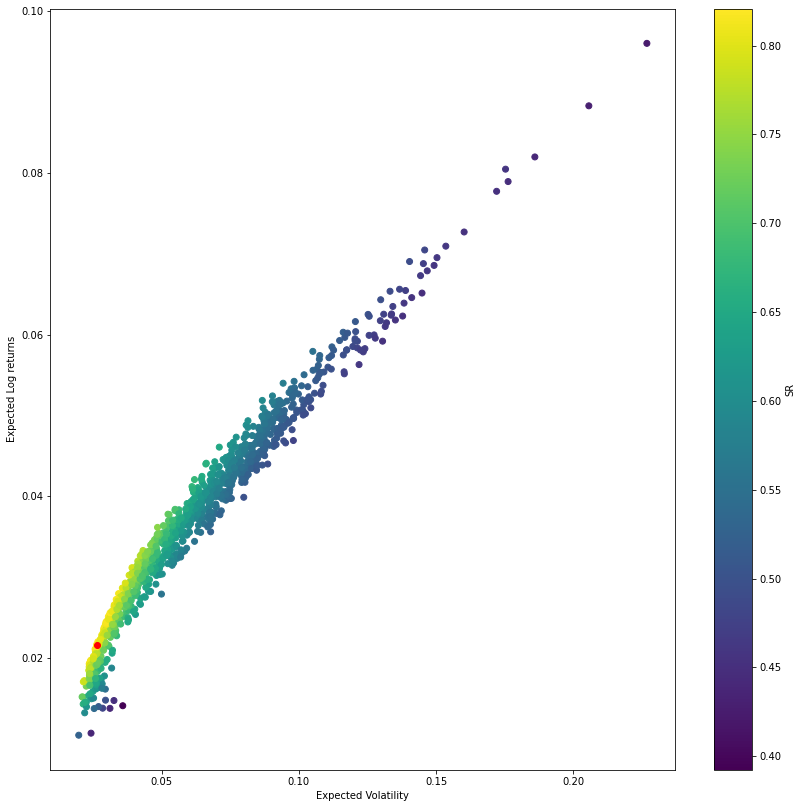

In [11]:
plt.figure(figsize=(14,14))
plt.scatter(expectedVolatility,expectedReurn,c=sharpeRatio)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Log returns')
plt.colorbar(label='SR')
plt.scatter(expectedVolatility[maxIndex],expectedReurn[maxIndex],c='red')
plt.show()

In [14]:
returns = np.linspace(0,0.07,50)
volatility_opt = []
def minimizeMyVolatility(w):
    w = np.array(w)
    V = np.sqrt(np.dot(w.T,np.dot(Sigma,w)))
    return V
def getReturn(w):
    w = np.array(w)
    R = np.sum(meanLogRet*w)
    return R

def checkSumToOne(w):
    return np.sum(w)-1

for ret in returns:
    #find best volatility
    w0 = [0.25,0.25,0.25,0.25]
    bounds = ((0,1),(0,1),(0,1),(0,1))
    constraints=({'type':'eq','fun':checkSumToOne},
                 {'type':'eq','fun':lambda w: getReturn(w) - ret})
    opt = minimize(minimizeMyVolatility,w0,method='SLSQP',bounds=bounds,constraints=constraints)
    #save my optimal volatility 
    volatility_opt.append(opt['fun'])
    

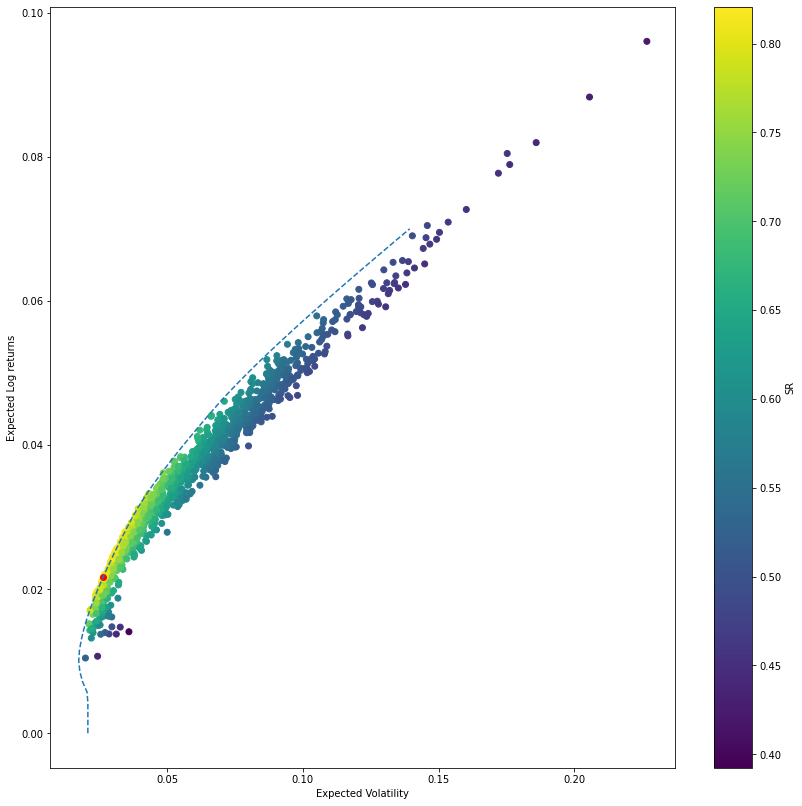

In [15]:
plt.figure(figsize=(14,14))
plt.scatter(expectedVolatility,expectedReurn,c=sharpeRatio)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Log returns')
plt.colorbar(label='SR')
plt.scatter(expectedVolatility[maxIndex],expectedReurn[maxIndex],c='red')
plt.plot(volatility_opt,returns,'--')
plt.show()